<h1>Informe sobre Machine Learning - Árboles de decisión</h1>
<b>Integrantes: </b>
<li> Maria Paula Mosquera Rengifo - 2110324



Imports

In [78]:
import sklearn
import numpy as np
import pandas as pd
from google.colab import files

## Leer archivo y clasificar la data
1.   Leer el archivo CO2_emissions.csv
2.   Seleccionar aleatoriamente el 80% del conjunto de datos para entrenar y el 20% restante para las pruebas.



In [80]:
from sklearn.model_selection import train_test_split
uploaded = files.upload()
dataALL=pd.read_csv('CO2 emissions.csv')
N=len(dataALL)
cTrain=int(N*0.8) # 80% para entrenar y 20% para probar
cTest=N-cTrain
print(N,cTrain,cTest)
train_data,test_data= sklearn.model_selection.train_test_split(dataALL, train_size=cTrain, test_size=cTest)

Saving CO2 emissions.csv to CO2 emissions (1).csv
1067 853 214


In [81]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 853 entries, 414 to 44
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            853 non-null    float64
 1   CYLINDERS             853 non-null    int64  
 2   FUELCONSUMPTION_CITY  853 non-null    float64
 3   FUELCONSUMPTION_HWY   853 non-null    float64
 4   CO2EMISSIONS          853 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 40.0 KB


Pruebas de verificación de datos

In [82]:
# número de filas, número de columnas
train_data.shape

(853, 5)

In [83]:
#Atributos Cuantitativos Enteros
train_data.select_dtypes(include=["int64"]).describe()

,CYLINDERS,CO2EMISSIONS
count,853.000000,853.000000
mean,5.777257,0.452521
std,1.789274,0.498033
min,3.000000,0.000000
25%,4.000000,0.000000
50%,6.000000,0.000000
75%,8.000000,1.000000
max,12.000000,1.000000


In [84]:
#Atributos Cuantitativos Reales
train_data.select_dtypes(include=["float64"]).describe()

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY
count,853.000000,853.000000,853.000000
mean,3.337749,13.248652,9.446659
std,1.414025,4.106601,2.791852
min,1.000000,4.600000,4.900000
25%,2.000000,10.200000,7.500000
50%,3.300000,12.500000,8.800000
75%,4.300000,15.400000,10.700000
max,8.400000,30.200000,20.500000


In [85]:
train_data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
414,2.0,4,10.9,7.5,0
589,2.0,4,11.1,8.3,0
505,2.0,4,9.8,7.0,0
232,2.4,4,10.0,7.0,0
602,1.8,4,9.3,6.4,0


# 3. Utilizar una estrategia para normalizar los datos y llenar los datos faltantes

<H1>Creación de Pipeline</H1>

---

In [86]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Pipeline para normalizar atributos numéricos

In [87]:
atributosNumericos = ["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY"]
numericosPipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")),
    ("scalerNumerico", StandardScaler())
])

#Pipeline completo

In [88]:
pipelineCompleto = ColumnTransformer([
    ("numericos", numericosPipeline, atributosNumericos)
])

#Extraemos las etiquetas de clase

In [89]:
entrenamientoX = pipelineCompleto.fit_transform(train_data)
entrenamientoX.shape
entrenamientoY = train_data["CO2EMISSIONS"]
entrenamientoY.shape
entrenamientoX[0,:]

array([-0.94661297, -0.99386655, -0.57225672, -0.6976733 ])

Gracias al pipeline quedamos con 4 valores posibles.
- Los 4 atributos son numéricos


<h1>Árboles de decisión

<h2>Algoritmo DecisionTreeClassifier

Imports

In [90]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

# Punto 4
Configurar los hiperparámetros del árbol de decisión de la siguiente manera: criterion=’gini’,
splitter=’best’, y random_state=123. Obtener 10 árboles de decisión que resultan de modificar el
hiperparámetro max_depth desde 1 hasta 10 de 1 en 1.

<h1>Modelo 1 </h1>

Características:
<li>criterion='gini'
<li>max_depth=1
<li>splitter="best"
<li>random_state=123

[0.95906433 0.97076023 0.96491228 0.97058824 0.96470588]
0.9660061919504643


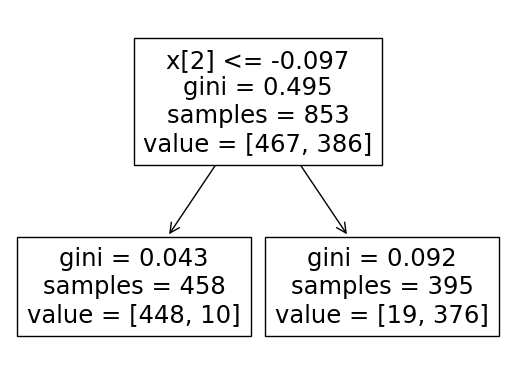

In [91]:
modelo1 = tree.DecisionTreeClassifier(criterion='gini',max_depth=1,splitter="best",random_state=123)
modelo1.fit(entrenamientoX, entrenamientoY)
scores1 = cross_val_score(modelo1, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores1)
print(scores1.mean())

tree.plot_tree(modelo1)
tree.export_graphviz(decision_tree=modelo1, class_names=True,out_file="Arbol.dot")

<h1>Modelo 2 </h1>

Características:
<li>criterion='gini'
<li>max_depth=2
<li>splitter="best"
<li>random_state=123

[0.96491228 0.95906433 0.96491228 0.96470588 0.96470588]
0.9636601307189542


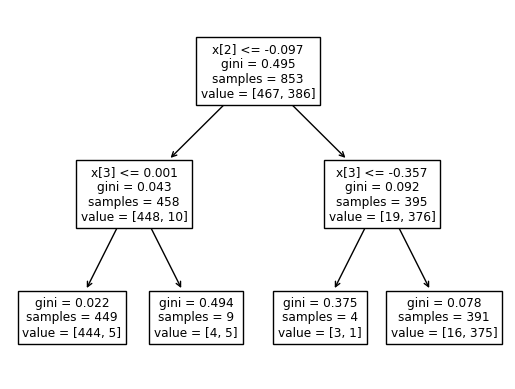

In [92]:
modelo2= tree.DecisionTreeClassifier(criterion='gini',max_depth=2,splitter="best",random_state=123)
modelo2.fit(entrenamientoX, entrenamientoY)
scores2 = cross_val_score(modelo2, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores2)
print(scores2.mean())

tree.plot_tree(modelo2)
tree.export_graphviz(decision_tree=modelo2, class_names=True,out_file="Arbol2.dot")

<h1>Modelo 3 </h1>

Características:
<li>criterion='gini'
<li>max_depth=3
<li>splitter="best"
<li>random_state=123

[0.96491228 0.97076023 0.96491228 0.97647059 0.97058824]
0.9695287237702098


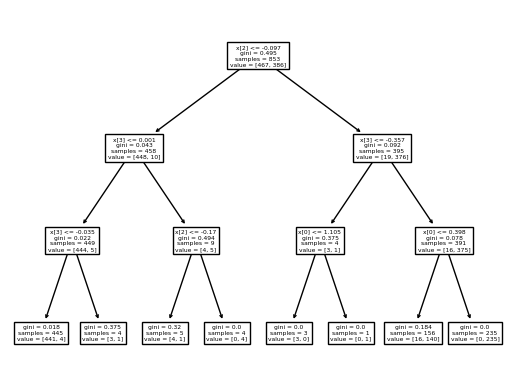

In [93]:
modelo3= tree.DecisionTreeClassifier(criterion='gini',max_depth=3,splitter="best",random_state=123)
modelo3.fit(entrenamientoX, entrenamientoY)
scores3 = cross_val_score(modelo3, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores3)
print(scores3.mean())

tree.plot_tree(modelo3)
tree.export_graphviz(decision_tree=modelo3, class_names=True,out_file="Arbol3.dot")

<h1>Modelo 4 </h1>

Características:
<li>criterion='gini'
<li>max_depth=4
<li>splitter="best"
<li>random_state=123

[0.95321637 0.95321637 0.96491228 0.97647059 0.98235294]
0.9660337117303062


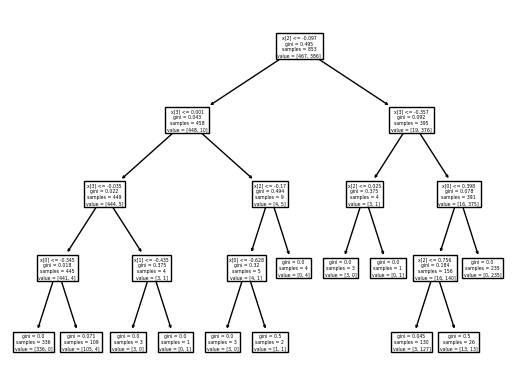

In [94]:
modelo4= tree.DecisionTreeClassifier(criterion='gini',max_depth=4,splitter="best",random_state=123)
modelo4.fit(entrenamientoX, entrenamientoY)
scores4 = cross_val_score(modelo4, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores4)
print(scores4.mean())

tree.plot_tree(modelo4)
tree.export_graphviz(decision_tree=modelo4, class_names=True,out_file="Arbol4.dot")

Ejecutamos los modelos en el conjunto de pruebas

<h1>Modelo 5 </h1>

Características:
<li>criterion='gini'
<li>max_depth=5
<li>splitter="best"
<li>random_state=123

[0.96491228 0.97660819 0.98245614 0.98235294 0.98823529]
0.9789129686962503


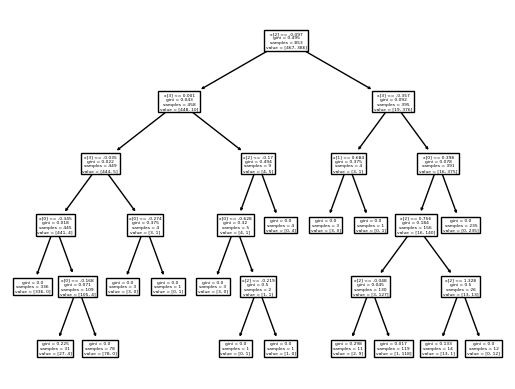

In [95]:
modelo5= tree.DecisionTreeClassifier(criterion='gini',max_depth=5,splitter="best",random_state=123)
modelo5.fit(entrenamientoX, entrenamientoY)
scores5 = cross_val_score(modelo5, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores5)
print(scores5.mean())

tree.plot_tree(modelo5)
tree.export_graphviz(decision_tree=modelo5, class_names=True,out_file="Arbol5.dot")

<h1>Modelo 6 </h1>

Características:
<li>criterion='gini'
<li>max_depth=6
<li>splitter="best"
<li>random_state=123

[0.96491228 0.97076023 0.97660819 0.97647059 0.98823529]
0.9753973168214655


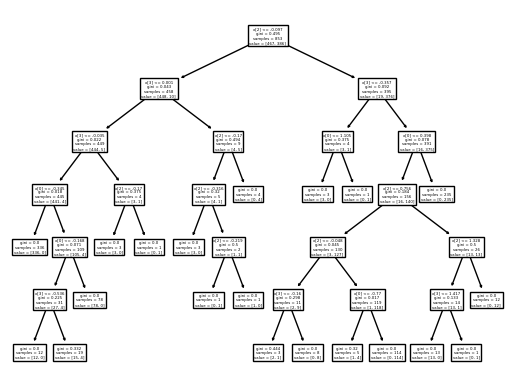

In [96]:
modelo6= tree.DecisionTreeClassifier(criterion='gini',max_depth=6,splitter="best",random_state=123)
modelo6.fit(entrenamientoX, entrenamientoY)
scores6 = cross_val_score(modelo6, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores6)
print(scores6.mean())

tree.plot_tree(modelo6)
tree.export_graphviz(decision_tree=modelo6, class_names=True,out_file="Arbol6.dot")

<h1>Modelo 7 </h1>

Características:
<li>criterion='gini'
<li>max_depth=7
<li>splitter="best"
<li>random_state=123

[0.96491228 0.97660819 0.98245614 0.97647059 0.98235294]
0.9765600275197798


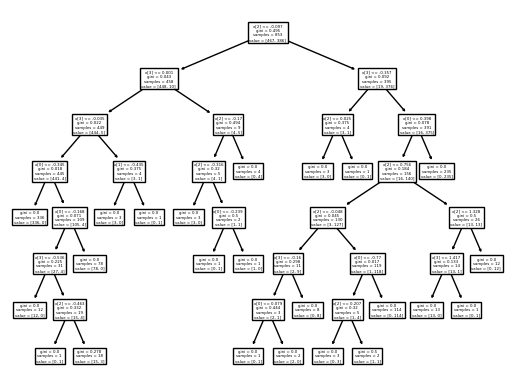

In [97]:
modelo7= tree.DecisionTreeClassifier(criterion='gini',max_depth=7,splitter="best",random_state=123)
modelo7.fit(entrenamientoX, entrenamientoY)
scores7 = cross_val_score(modelo7, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores7)
print(scores7.mean())

tree.plot_tree(modelo7)
tree.export_graphviz(decision_tree=modelo7, class_names=True,out_file="Arbol7.dot")

<h1>Modelo 8 </h1>

Características:
<li>criterion='gini'
<li>max_depth=8
<li>splitter="best"
<li>random_state=123

[0.96491228 0.98245614 0.98245614 0.97647059 0.98823529]
0.9789060887512899


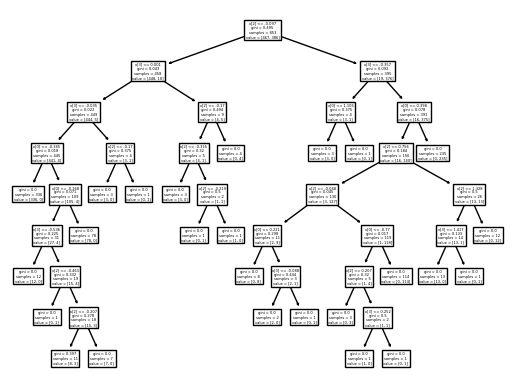

In [98]:
modelo8= tree.DecisionTreeClassifier(criterion='gini',max_depth=8,splitter="best",random_state=123)
modelo8.fit(entrenamientoX, entrenamientoY)
scores8 = cross_val_score(modelo8, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores8)
print(scores8.mean())

tree.plot_tree(modelo8)
tree.export_graphviz(decision_tree=modelo8, class_names=True,out_file="Arbol8.dot")

<h1>Modelo 9 </h1>

Características:
<li>criterion='gini'
<li>max_depth=9
<li>splitter="best"
<li>random_state=123

[0.95906433 0.98245614 0.98245614 0.97647059 0.98235294]
0.9765600275197798


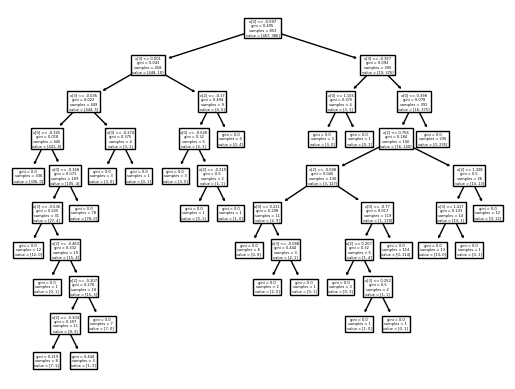

In [99]:
modelo9= tree.DecisionTreeClassifier(criterion='gini',max_depth=9,splitter="best",random_state=123)
modelo9.fit(entrenamientoX, entrenamientoY)
scores9 = cross_val_score(modelo9, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores9)
print(scores9.mean())

tree.plot_tree(modelo9)
tree.export_graphviz(decision_tree=modelo9, class_names=True,out_file="Arbol9.dot")

<h1>Modelo 10 </h1>

Características:
<li>criterion='gini'
<li>max_depth=10
<li>splitter="best"
<li>random_state=123

[0.95906433 0.98245614 0.98245614 0.97647059 0.98235294]
0.9765600275197798


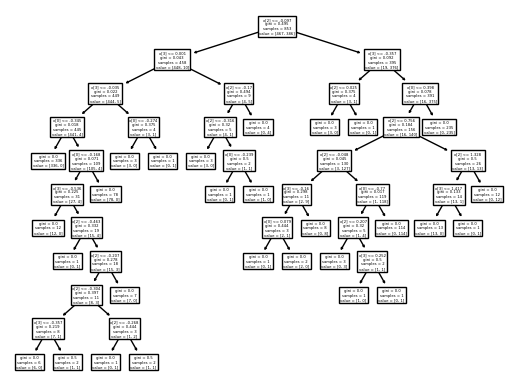

In [100]:
modelo10= tree.DecisionTreeClassifier(criterion='gini',max_depth=10,splitter="best",random_state=123)
modelo10.fit(entrenamientoX, entrenamientoY)
scores10 = cross_val_score(modelo10, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores10)
print(scores10.mean())

tree.plot_tree(modelo10)
tree.export_graphviz(decision_tree=modelo10, class_names=True,out_file="Arbol10.dot")

In [101]:
datosPrueba = pipelineCompleto.transform(test_data)
prediccion1 = modelo1.predict(datosPrueba)
prediccion2 = modelo2.predict(datosPrueba)
prediccion3 = modelo3.predict(datosPrueba)
prediccion4 = modelo4.predict(datosPrueba)
prediccion5 = modelo5.predict(datosPrueba)
prediccion6 = modelo6.predict(datosPrueba)
prediccion7 = modelo7.predict(datosPrueba)
prediccion8 = modelo8.predict(datosPrueba)
prediccion9 = modelo9.predict(datosPrueba)
prediccion10 = modelo10.predict(datosPrueba)

Prints para los valores de las predicciones

In [102]:
prediccion1
# prediccion2
# prediccion3
# prediccion4
# prediccion5
# prediccion6
# prediccion7
# prediccion8
# prediccion9
# prediccion10

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0])

Probamos los modelos

In [103]:
prueba = test_data["CO2EMISSIONS"]
prueba

1031    0
841     1
740     0
767     1
944     0
       ..
769     1
885     1
38      0
220     1
81      0
Name: CO2EMISSIONS, Length: 214, dtype: int64

#Punto 5
Incluya en el notebook una tabla con el accuracy para los 10 árboles del punto anterior

In [104]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tabulate import tabulate

accuracy1 = accuracy_score(prueba, prediccion1)
accuracy2 = accuracy_score(prueba, prediccion2)
accuracy3 = accuracy_score(prueba, prediccion3)
accuracy4 = accuracy_score(prueba, prediccion4)
accuracy5 = accuracy_score(prueba, prediccion5)
accuracy6 = accuracy_score(prueba, prediccion6)
accuracy7 = accuracy_score(prueba, prediccion7)
accuracy8 = accuracy_score(prueba, prediccion8)
accuracy9 = accuracy_score(prueba, prediccion9)
accuracy10 = accuracy_score(prueba, prediccion10)

print("Precision del modelo 1:", accuracy1)
print("Precision del modelo 2:", accuracy2)
print("Precision del modelo 3:", accuracy3)
print("Precision del modelo 4:", accuracy4)
print("Precision del modelo 5:", accuracy5)
print("Precision del modelo 6:", accuracy6)
print("Precision del modelo 7:", accuracy7)
print("Precision del modelo 8:", accuracy8)
print("Precision del modelo 9:", accuracy9)
print("Precision del modelo 10:", accuracy10)

matrizConfusion1 = confusion_matrix(prueba, prediccion1)
matrizConfusion2 = confusion_matrix(prueba, prediccion2)
matrizConfusion3 = confusion_matrix(prueba, prediccion3)
matrizConfusion4 = confusion_matrix(prueba, prediccion4)
matrizConfusion5 = confusion_matrix(prueba, prediccion5)
matrizConfusion6 = confusion_matrix(prueba, prediccion6)
matrizConfusion7 = confusion_matrix(prueba, prediccion7)
matrizConfusion8 = confusion_matrix(prueba, prediccion8)
matrizConfusion9 = confusion_matrix(prueba, prediccion9)
matrizConfusion10 = confusion_matrix(prueba, prediccion10)

#matriz = plt.subplot()
#sns.heatmap(matrizConfusion1, annot=True, ax = matriz, fmt='d')
#sns.heatmap(matrizConfusion2, annot=True, ax = matriz, fmt='d')
#sns.heatmap(matrizConfusion3, annot=True, ax = matriz, fmt='d')
#sns.heatmap(matrizConfusion4, annot=True, ax = matriz, fmt='d')
#sns.heatmap(matrizConfusion5, annot=True, ax = matriz, fmt='d')
#sns.heatmap(matrizConfusion6, annot=True, ax = matriz, fmt='d')
#sns.heatmap(matrizConfusion7, annot=True, ax = matriz, fmt='d')
#sns.heatmap(matrizConfusion8, annot=True, ax = matriz, fmt='d')
#sns.heatmap(matrizConfusion9, annot=True, ax = matriz, fmt='d')
#sns.heatmap(matrizConfusion10, annot=True, ax = matriz, fmt='d')

#matriz.set_xlabel("Valores predecidos")
#matriz.set_ylabel("Valores reales")
#matriz.set_title("Matriz de confusion - Derrame cerebral")
#matriz.xaxis.set_ticklabels(['Negativo=0', 'Positivo=1'])
#matriz.yaxis.set_ticklabels(['Negativo=0', 'Positivo=1'])

# print("Matriz de Confusión para modelo 1")
# print("Matriz de Confusión para modelo 2")
# print("Matriz de Confusión para modelo 3")
# print("Matriz de Confusión para modelo 4")
# print("Matriz de Confusión para modelo 5")
# print("Matriz de Confusión para modelo 6")
# print("Matriz de Confusión para modelo 7")
# print("Matriz de Confusión para modelo 8")
# print("Matriz de Confusión para modelo 0")
# print("Matriz de Confusión para modelo 10")
# plt.show()

# Crear el DataFrame con los valores de accuracy
accuracy_values = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6, accuracy7, accuracy8, accuracy9, accuracy10]
df_accuracy = pd.DataFrame({"Modelo": range(1, 11), "Accuracy": accuracy_values})

# Imprimir la tabla
tabla = tabulate(df_accuracy, headers="keys", tablefmt="pipe", showindex=False)
print("\n")
print(tabla)

Precision del modelo 1: 0.9485981308411215
Precision del modelo 2: 0.9532710280373832
Precision del modelo 3: 0.9532710280373832
Precision del modelo 4: 0.9439252336448598
Precision del modelo 5: 0.9672897196261683
Precision del modelo 6: 0.9766355140186916
Precision del modelo 7: 0.9672897196261683
Precision del modelo 8: 0.9672897196261683
Precision del modelo 9: 0.9672897196261683
Precision del modelo 10: 0.9672897196261683


|   Modelo |   Accuracy |
|---------:|-----------:|
|        1 |   0.948598 |
|        2 |   0.953271 |
|        3 |   0.953271 |
|        4 |   0.943925 |
|        5 |   0.96729  |
|        6 |   0.976636 |
|        7 |   0.96729  |
|        8 |   0.96729  |
|        9 |   0.96729  |
|       10 |   0.96729  |


#Punto 6
Repita el mismo procedimiento del punto 4 usando como hiperparámetros criterion=’entropy’,
splitter=’best’, random_state=123, y variando el hiperparámetro max_depth desde 1 hasta 10 de 1 en 1.

<h1>Modelo 1 </h1>

Características:
<li>criterion='entropy'
<li>max_depth=1
<li>splitter="best"
<li>random_state=123

[0.95906433 0.97076023 0.96491228 0.97058824 0.96470588]
0.9660061919504643


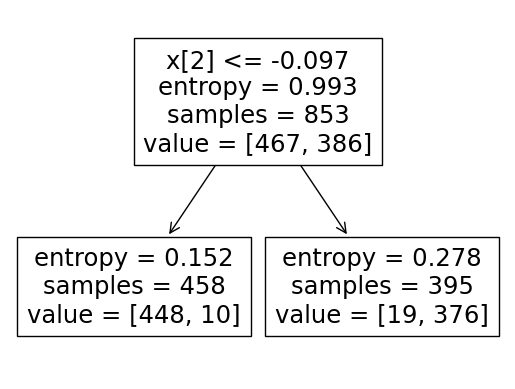

In [105]:
modelo1P6= tree.DecisionTreeClassifier(criterion='entropy',max_depth=1,splitter="best",random_state=123)
modelo1P6.fit(entrenamientoX, entrenamientoY)
scores1P6 = cross_val_score(modelo1P6, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores1P6)
print(scores1P6.mean())

tree.plot_tree(modelo1P6)
tree.export_graphviz(decision_tree=modelo1P6, class_names=True,out_file="Arbol1P6.dot")

<h1>Modelo 2 </h1>

Características:
<li>criterion='entropy'
<li>max_depth=2
<li>splitter="best"
<li>random_state=123

[0.95906433 0.95321637 0.96491228 0.97058824 0.96470588]
0.9624974200206399


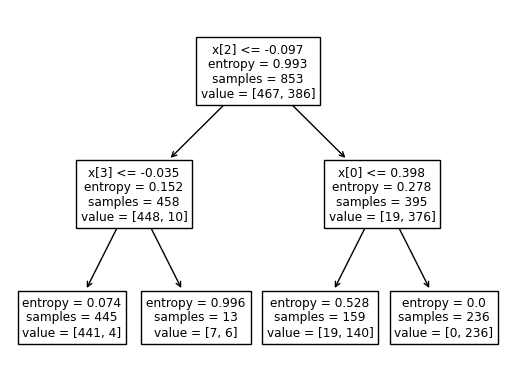

In [106]:
modelo2P6= tree.DecisionTreeClassifier(criterion='entropy',max_depth=2,splitter="best",random_state=123)
modelo2P6.fit(entrenamientoX, entrenamientoY)
scores2P6 = cross_val_score(modelo2P6, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores2P6)
print(scores2P6.mean())

tree.plot_tree(modelo2P6)
tree.export_graphviz(decision_tree=modelo2P6, class_names=True,out_file="Arbol2P6.dot")

<h1>Modelo 3 </h1>

Características:
<li>criterion='entropy'
<li>max_depth=3
<li>splitter="best"
<li>random_state=123

[0.95321637 0.95906433 0.96491228 0.98235294 0.96470588]
0.9648503611971104


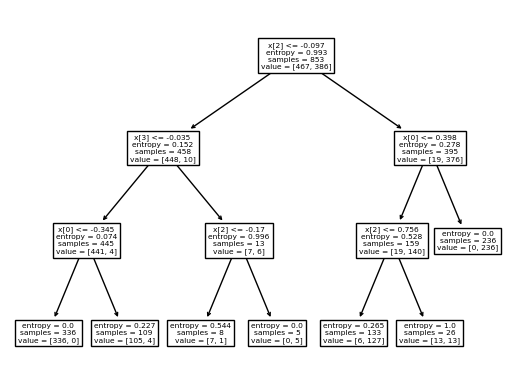

In [107]:
modelo3P6= tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,splitter="best",random_state=123)
modelo3P6.fit(entrenamientoX, entrenamientoY)
scores3P6 = cross_val_score(modelo3P6, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores3P6)
print(scores3P6.mean())

tree.plot_tree(modelo3P6)
tree.export_graphviz(decision_tree=modelo3P6, class_names=True,out_file="Arbol3P6.dot")

<h1>Modelo 4 </h1>

Características:
<li>criterion='entropy'
<li>max_depth=4
<li>splitter="best"
<li>random_state=123

[0.96491228 0.97660819 0.98245614 0.98235294 0.98235294]
0.9777364981080151


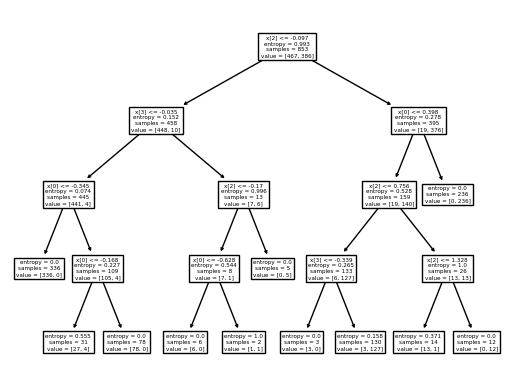

In [108]:
modelo4P6= tree.DecisionTreeClassifier(criterion='entropy',max_depth=4,splitter="best",random_state=123)
modelo4P6.fit(entrenamientoX, entrenamientoY)
scores4P6 = cross_val_score(modelo4P6, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores4P6)
print(scores4P6.mean())

tree.plot_tree(modelo4P6)
tree.export_graphviz(decision_tree=modelo4P6, class_names=True,out_file="Arbol4P6.dot")

<h1>Modelo 5 </h1>

Características:
<li>criterion='entropy'
<li>max_depth=5
<li>splitter="best"
<li>random_state=123

[0.97076023 0.97660819 0.98245614 0.98235294 0.98823529]
0.9800825593395253


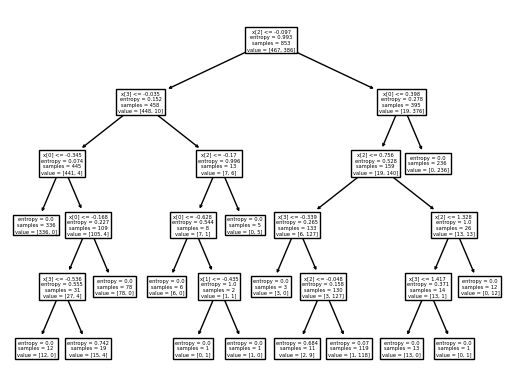

In [109]:
modelo5P6 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,splitter="best",random_state=123)
modelo5P6.fit(entrenamientoX, entrenamientoY)
scores5P6 = cross_val_score(modelo5P6, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores5P6)
print(scores5P6.mean())

tree.plot_tree(modelo5P6)
tree.export_graphviz(decision_tree=modelo5P6, class_names=True,out_file="Arbol5P6.dot")

<h1>Modelo 6 </h1>

Características:
<li>criterion='entropy'
<li>max_depth=6
<li>splitter="best"
<li>random_state=123

[0.97076023 0.96491228 0.98245614 0.97647059 0.98823529]
0.9765669074647402


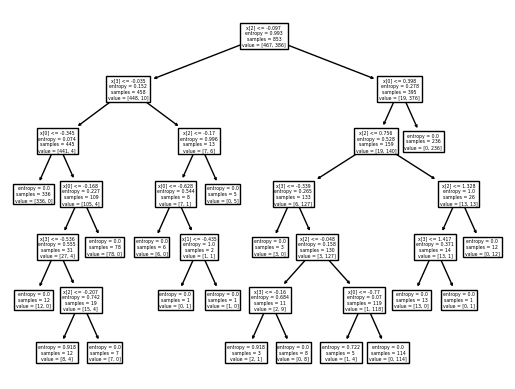

In [110]:
modelo6P6= tree.DecisionTreeClassifier(criterion='entropy',max_depth=6,splitter="best",random_state=123)
modelo6P6.fit(entrenamientoX, entrenamientoY)
scores6P6 = cross_val_score(modelo6P6, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores6P6)
print(scores6P6.mean())

tree.plot_tree(modelo6P6)
tree.export_graphviz(decision_tree=modelo6P6, class_names=True,out_file="Arbol6P6.dot")

<h1>Modelo 7 </h1>

Características:
<li>criterion='entropy'
<li>max_depth=7
<li>splitter="best"
<li>random_state=123

[0.96491228 0.97076023 0.98245614 0.97058824 0.98823529]
0.975390436876505


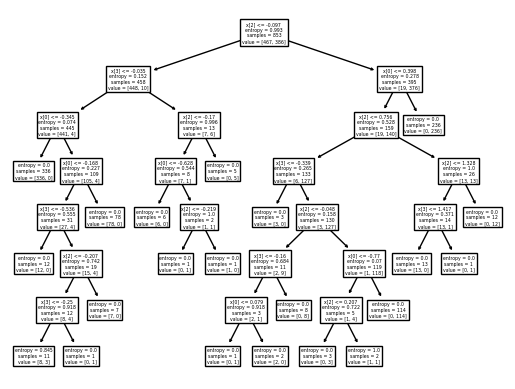

In [111]:
modelo7P6 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=7,splitter="best",random_state=123)
modelo7P6.fit(entrenamientoX, entrenamientoY)
scores7P6 = cross_val_score(modelo7P6, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores7P6)
print(scores7P6.mean())

tree.plot_tree(modelo7P6)
tree.export_graphviz(decision_tree=modelo7P6, class_names=True,out_file="Arbol7P6.dot")

<h1>Modelo 8 </h1>

Características:
<li>criterion='entropy'
<li>max_depth=8
<li>splitter="best"
<li>random_state=123

[0.96491228 0.97076023 0.98245614 0.97647059 0.98823529]
0.9765669074647402


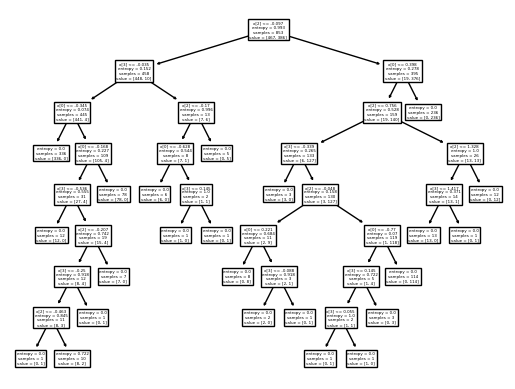

In [112]:
modelo8P6= tree.DecisionTreeClassifier(criterion='entropy',max_depth=8,splitter="best",random_state=123)
modelo8P6.fit(entrenamientoX, entrenamientoY)
scores8P6 = cross_val_score(modelo8P6, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores8P6)
print(scores8P6.mean())

tree.plot_tree(modelo8P6)
tree.export_graphviz(decision_tree=modelo8P6, class_names=True,out_file="Arbol8P6.dot")

<h1>Modelo 9 </h1>

Características:
<li>criterion='entropy'
<li>max_depth=9
<li>splitter="best"
<li>random_state=123

[0.96491228 0.97076023 0.98245614 0.97647059 0.98823529]
0.9765669074647402


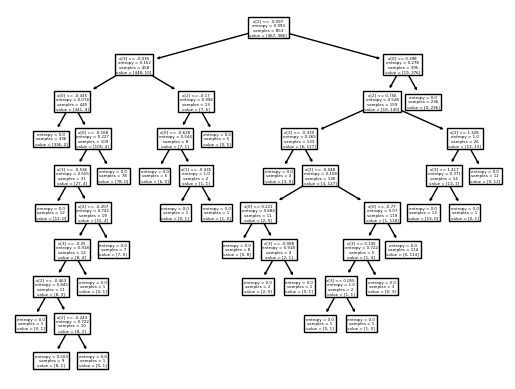

In [113]:
modelo9P6= tree.DecisionTreeClassifier(criterion='entropy',max_depth=9,splitter="best",random_state=123)
modelo9P6.fit(entrenamientoX, entrenamientoY)
scores9P6 = cross_val_score(modelo9P6, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores9P6)
print(scores9P6.mean())

tree.plot_tree(modelo9P6)
tree.export_graphviz(decision_tree=modelo9P6, class_names=True,out_file="Arbol9P6.dot")

<h1>Modelo 10 </h1>

Características:
<li>criterion='entropy'
<li>max_depth=10
<li>splitter="best"
<li>random_state=123

[0.96491228 0.97076023 0.98245614 0.97647059 0.98823529]
0.9765669074647402


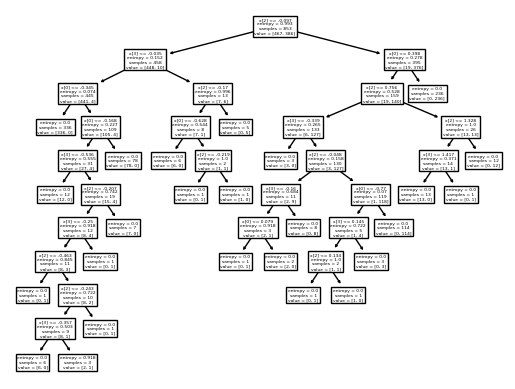

In [114]:
modelo10P6= tree.DecisionTreeClassifier(criterion='entropy',max_depth=10,splitter="best",random_state=123)
modelo10P6.fit(entrenamientoX, entrenamientoY)
scores10P6 = cross_val_score(modelo10P6, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores10P6)
print(scores10P6.mean())

tree.plot_tree(modelo10P6)
tree.export_graphviz(decision_tree=modelo10P6, class_names=True,out_file="Arbol10P6.dot")

Ejecutamos los modelos en el conjunto de pruebas

In [115]:
datosPruebaP6 = pipelineCompleto.transform(test_data)
prediccion1P6 = modelo1P6.predict(datosPruebaP6)
prediccion2P6 = modelo2P6.predict(datosPruebaP6)
prediccion3P6 = modelo3P6.predict(datosPruebaP6)
prediccion4P6 = modelo4P6.predict(datosPruebaP6)
prediccion5P6 = modelo5P6.predict(datosPruebaP6)
prediccion6P6 = modelo6P6.predict(datosPruebaP6)
prediccion7P6 = modelo7P6.predict(datosPruebaP6)
prediccion8P6 = modelo8P6.predict(datosPruebaP6)
prediccion9P6 = modelo9P6.predict(datosPruebaP6)
prediccion10P6 = modelo10P6.predict(datosPruebaP6)

Prints para los valores de las predicciones

In [116]:
prediccion1P6
#prediccion2P6
#prediccion3P6
#prediccion4P6
#prediccion5P6
#prediccion6P6
#prediccion7P6
#prediccion8P6
#prediccion9P6
#prediccion10P6

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0])

Probamos los modelos

In [117]:
pruebaP6 = test_data["CO2EMISSIONS"]
pruebaP6

1031    0
841     1
740     0
767     1
944     0
       ..
769     1
885     1
38      0
220     1
81      0
Name: CO2EMISSIONS, Length: 214, dtype: int64

#A continuación la tabla de accuracy y la matriz de confusión

In [118]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tabulate import tabulate

accuracy1P6 = accuracy_score(pruebaP6, prediccion1P6)
accuracy2P6 = accuracy_score(pruebaP6, prediccion2P6)
accuracy3P6 = accuracy_score(pruebaP6, prediccion3P6)
accuracy4P6 = accuracy_score(pruebaP6, prediccion4P6)
accuracy5P6 = accuracy_score(pruebaP6, prediccion5P6)
accuracy6P6 = accuracy_score(pruebaP6, prediccion6P6)
accuracy7P6 = accuracy_score(pruebaP6, prediccion7P6)
accuracy8P6 = accuracy_score(pruebaP6, prediccion8P6)
accuracy9P6 = accuracy_score(pruebaP6, prediccion9P6)
accuracy10P6 = accuracy_score(pruebaP6, prediccion10P6)

print("Precision del modelo 1:", accuracy1P6)
print("Precision del modelo 2:", accuracy2P6)
print("Precision del modelo 3:", accuracy3P6)
print("Precision del modelo 4:", accuracy4P6)
print("Precision del modelo 5:", accuracy5P6)
print("Precision del modelo 6:", accuracy6P6)
print("Precision del modelo 7:", accuracy7P6)
print("Precision del modelo 8:", accuracy8P6)
print("Precision del modelo 9:", accuracy9P6)
print("Precision del modelo 10:", accuracy10P6)

"""
matrizConfusion1 = confusion_matrix(pruebaP6, prediccion1P6)
matrizConfusion2 = confusion_matrix(pruebaP6, prediccion2P6)
matrizConfusion3 = confusion_matrix(pruebaP6, prediccion3P6)
matrizConfusion4 = confusion_matrix(pruebaP6, prediccion4P6)
matrizConfusion5 = confusion_matrix(pruebaP6, prediccion5P6)
matrizConfusion6 = confusion_matrix(pruebaP6, prediccion6P6)
matrizConfusion7 = confusion_matrix(pruebaP6, prediccion7P6)
matrizConfusion8 = confusion_matrix(pruebaP6, prediccion8P6)
matrizConfusion9 = confusion_matrix(pruebaP6, prediccion9P6)
matrizConfusion10 = confusion_matrix(pruebaP6, prediccion10P6)

matriz = plt.subplot()
sns.heatmap(matrizConfusion1, annot=True, ax = matriz, fmt='d')
sns.heatmap(matrizConfusion2, annot=True, ax = matriz, fmt='d')
sns.heatmap(matrizConfusion3, annot=True, ax = matriz, fmt='d')
sns.heatmap(matrizConfusion4, annot=True, ax = matriz, fmt='d')
sns.heatmap(matrizConfusion5, annot=True, ax = matriz, fmt='d')
sns.heatmap(matrizConfusion6, annot=True, ax = matriz, fmt='d')
sns.heatmap(matrizConfusion7, annot=True, ax = matriz, fmt='d')
sns.heatmap(matrizConfusion8, annot=True, ax = matriz, fmt='d')
sns.heatmap(matrizConfusion9, annot=True, ax = matriz, fmt='d')
sns.heatmap(matrizConfusion10, annot=True, ax = matriz, fmt='d')

matriz.set_xlabel("Valores predecidos")
matriz.set_ylabel("Valores reales")
matriz.set_title("Matriz de confusion - Derrame cerebral")
matriz.xaxis.set_ticklabels(['Negativo=0', 'Positivo=1'])
matriz.yaxis.set_ticklabels(['Negativo=0', 'Positivo=1'])

print("Matriz de Confusión para modelo 1")
print("Matriz de Confusión para modelo 2")
print("Matriz de Confusión para modelo 3")
print("Matriz de Confusión para modelo 4")
print("Matriz de Confusión para modelo 5")
print("Matriz de Confusión para modelo 6")
print("Matriz de Confusión para modelo 7")
print("Matriz de Confusión para modelo 8")
print("Matriz de Confusión para modelo 9")
print("Matriz de Confusión para modelo 10")
plt.show()"""

# Crear el DataFrame con los valores de accuracy
accuracy_values = [accuracy1P6, accuracy2P6, accuracy3P6, accuracy4P6, accuracy5P6, accuracy6P6, accuracy7P6, accuracy8P6, accuracy9P6, accuracy10P6]
df_accuracy = pd.DataFrame({"Modelo": range(1, 11), "Accuracy": accuracy_values})

# Imprimir la tabla
tabla = tabulate(df_accuracy, headers="keys", tablefmt="pipe", showindex=False)
print("\n")
print(tabla)

Precision del modelo 1: 0.9485981308411215
Precision del modelo 2: 0.9485981308411215
Precision del modelo 3: 0.9439252336448598
Precision del modelo 4: 0.9672897196261683
Precision del modelo 5: 0.9672897196261683
Precision del modelo 6: 0.9719626168224299
Precision del modelo 7: 0.9672897196261683
Precision del modelo 8: 0.9626168224299065
Precision del modelo 9: 0.9626168224299065
Precision del modelo 10: 0.9672897196261683


|   Modelo |   Accuracy |
|---------:|-----------:|
|        1 |   0.948598 |
|        2 |   0.948598 |
|        3 |   0.943925 |
|        4 |   0.96729  |
|        5 |   0.96729  |
|        6 |   0.971963 |
|        7 |   0.96729  |
|        8 |   0.962617 |
|        9 |   0.962617 |
|       10 |   0.96729  |


#Punto 8
Repita el mismo procedimiento del punto 4 usando como hiperparámetros criterion=’entropy’,
splitter=’random’, random_state=123, y variando el hiperparámetro max_depth desde 1 hasta 10 de 1 en 1.

<h1>Modelo 1 </h1>

Características:
<li>criterion='entropy'
<li>max_depth=1
<li>splitter="random"
<li>random_state=123

[0.84795322 0.85964912 0.83625731 0.80588235 0.83529412]
0.8370072239422084


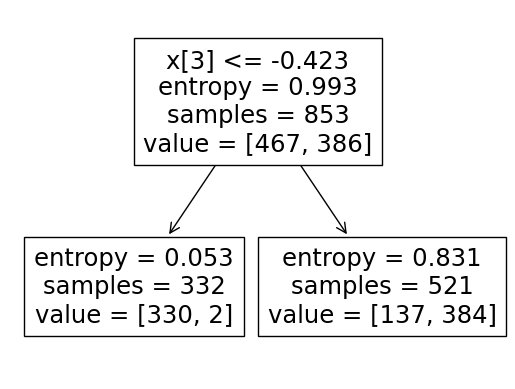

In [119]:
modelo1P8= tree.DecisionTreeClassifier(criterion='entropy',max_depth=1,splitter="random",random_state=123)
modelo1P8.fit(entrenamientoX, entrenamientoY)
scores1P8 = cross_val_score(modelo1P8, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores1P8)
print(scores1P8.mean())

tree.plot_tree(modelo1P8)
tree.export_graphviz(decision_tree=modelo1P8, class_names=True,out_file="Arbol1P8.dot")

<h1>Modelo 2 </h1>

Características:
<li>criterion='entropy'
<li>max_depth=2
<li>splitter="random"
<li>random_state=123

[0.84795322 0.8245614  0.83625731 0.80588235 0.87058824]
0.837048503611971


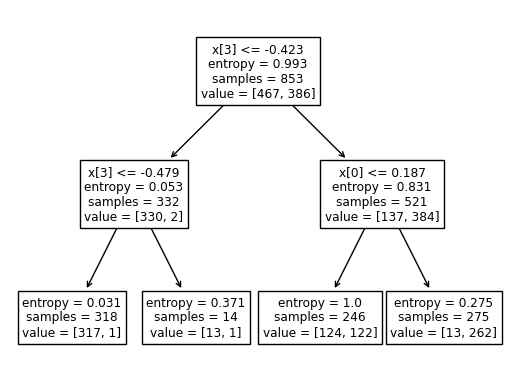

In [120]:
modelo2P8= tree.DecisionTreeClassifier(criterion='entropy',max_depth=2,splitter="random",random_state=123)
modelo2P8.fit(entrenamientoX, entrenamientoY)
scores2P8 = cross_val_score(modelo2P8, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores2P8)
print(scores2P8.mean())

tree.plot_tree(modelo2P8)
tree.export_graphviz(decision_tree=modelo2P8, class_names=True,out_file="Arbol2P8.dot")

<h1>Modelo 3 </h1>

Características:
<li>criterion='entropy'
<li>max_depth=3
<li>splitter="random"
<li>random_state=123

[0.94736842 0.97076023 0.91812865 0.93529412 0.91176471]
0.9366632266941866


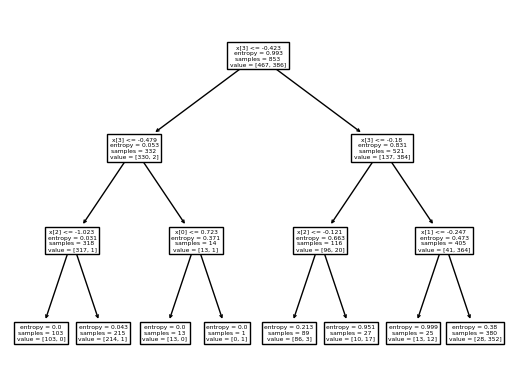

In [121]:
modelo3P8= tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,splitter="random",random_state=123)
modelo3P8.fit(entrenamientoX, entrenamientoY)
scores3P8 = cross_val_score(modelo3P8, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores3P8)
print(scores3P8.mean())

tree.plot_tree(modelo3P8)
tree.export_graphviz(decision_tree=modelo3P8, class_names=True,out_file="Arbol3P8.dot")

<h1>Modelo 4 </h1>

Características:
<li>criterion='entropy'
<li>max_depth=4
<li>splitter="random"
<li>random_state=123

[0.87719298 0.87134503 0.91812865 0.93529412 0.90588235]
0.9015686274509804


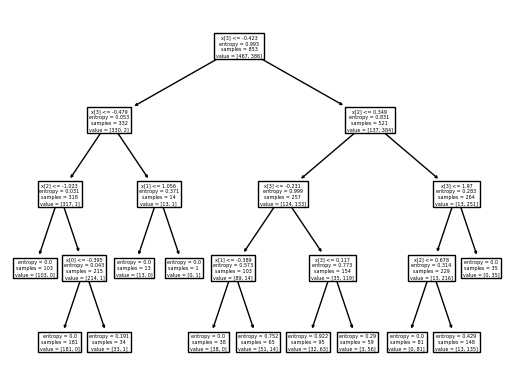

In [122]:
modelo4P8= tree.DecisionTreeClassifier(criterion='entropy',max_depth=4,splitter="random",random_state=123)
modelo4P8.fit(entrenamientoX, entrenamientoY)
scores4P8 = cross_val_score(modelo4P8, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores4P8)
print(scores4P8.mean())

tree.plot_tree(modelo4P8)
tree.export_graphviz(decision_tree=modelo4P8, class_names=True,out_file="Arbol4P8.dot")

<h1>Modelo 5 </h1>

Características:
<li>criterion='entropy'
<li>max_depth=5
<li>splitter="random"
<li>random_state=123

[0.90643275 0.89473684 0.93567251 0.93529412 0.91764706]
0.9179566563467493


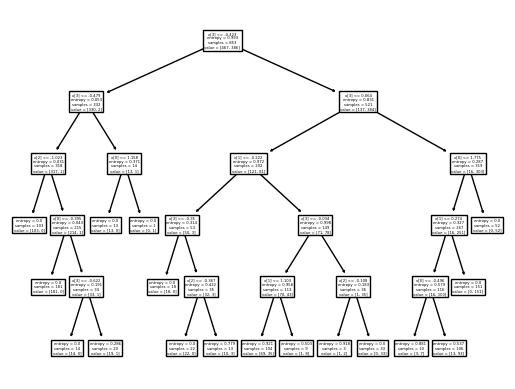

In [123]:
modelo5P8= tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,splitter="random",random_state=123)
modelo5P8.fit(entrenamientoX, entrenamientoY)
scores5P8 = cross_val_score(modelo5P8, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores5P8)
print(scores5P8.mean())

tree.plot_tree(modelo5P8)
tree.export_graphviz(decision_tree=modelo5P8, class_names=True,out_file="Arbol5P8.dot")

<h1>Modelo 6 </h1>

Características:
<li>criterion='entropy'
<li>max_depth=6
<li>splitter="random"
<li>random_state=123

[0.94736842 0.9122807  0.94152047 0.93529412 0.95882353]
0.9390574475404196


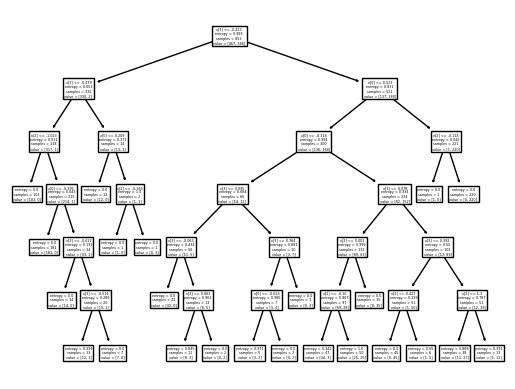

In [124]:
modelo6P8= tree.DecisionTreeClassifier(criterion='entropy',max_depth=6,splitter="random",random_state=123)
modelo6P8.fit(entrenamientoX, entrenamientoY)
scores6P8 = cross_val_score(modelo6P8, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores6P8)
print(scores6P8.mean())

tree.plot_tree(modelo6P8)
tree.export_graphviz(decision_tree=modelo6P8, class_names=True,out_file="Arbol6P8.dot")

<h1>Modelo 7 </h1>

Características:
<li>criterion='entropy'
<li>max_depth=7
<li>splitter="random"
<li>random_state=123

[0.94736842 0.96491228 0.94736842 0.88235294 0.91176471]
0.9307533539731683


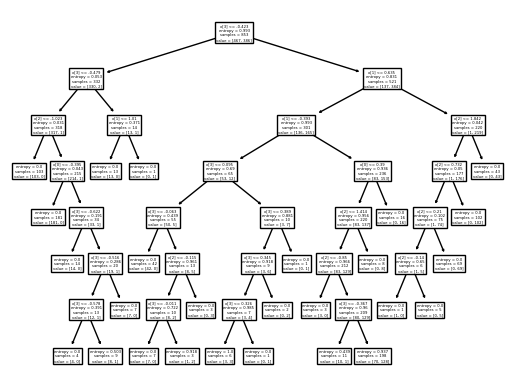

In [125]:
modelo7P8= tree.DecisionTreeClassifier(criterion='entropy',max_depth=7,splitter="random",random_state=123)
modelo7P8.fit(entrenamientoX, entrenamientoY)
scores7P8 = cross_val_score(modelo7P8, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores7P8)
print(scores7P8.mean())

tree.plot_tree(modelo7P8)
tree.export_graphviz(decision_tree=modelo7P8, class_names=True,out_file="Arbol7P8.dot")

<h1>Modelo 8 </h1>

Características:
<li>criterion='entropy'
<li>max_depth=8
<li>splitter="random"
<li>random_state=123

[0.95906433 0.94152047 0.97076023 0.93529412 0.97647059]
0.9566219470244238


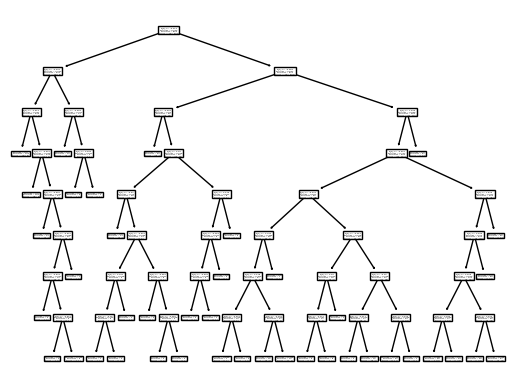

In [126]:
modelo8P8= tree.DecisionTreeClassifier(criterion='entropy',max_depth=8,splitter="random",random_state=123)
modelo8P8.fit(entrenamientoX, entrenamientoY)
scores8P8 = cross_val_score(modelo8P8, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores8P8)
print(scores8P8.mean())

tree.plot_tree(modelo8P8)
tree.export_graphviz(decision_tree=modelo8P8, class_names=True,out_file="Arbol8P8.dot")

<h1>Modelo 9 </h1>

Características:
<li>criterion='entropy'
<li>max_depth=9
<li>splitter="random"
<li>random_state=123

[0.94152047 0.94152047 0.99415205 0.96470588 0.98235294]
0.9648503611971104


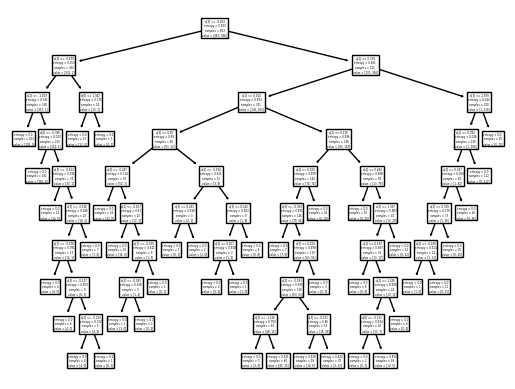

In [127]:
modelo9P8= tree.DecisionTreeClassifier(criterion='entropy',max_depth=9,splitter="random",random_state=123)
modelo9P8.fit(entrenamientoX, entrenamientoY)
scores9P8 = cross_val_score(modelo9P8, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores9P8)
print(scores9P8.mean())

tree.plot_tree(modelo9P8)
tree.export_graphviz(decision_tree=modelo9P8, class_names=True,out_file="Arbol9P8.dot")

<h1>Modelo 10 </h1>

Características:
<li>criterion='entropy'
<li>max_depth=10
<li>splitter="random"
<li>random_state=123

[0.98830409 0.97660819 0.98830409 0.95882353 0.95882353]
0.974172686618507


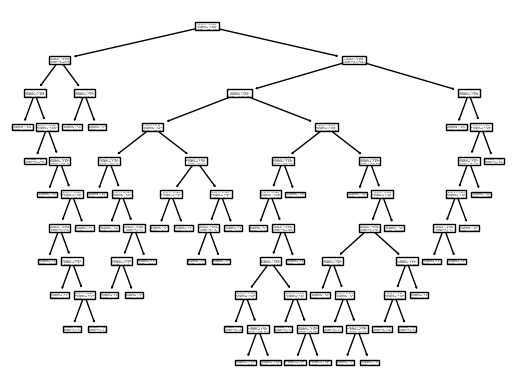

In [128]:
modelo10P8= tree.DecisionTreeClassifier(criterion='entropy',max_depth=10,splitter="random",random_state=123)
modelo10P8.fit(entrenamientoX, entrenamientoY)
scores10P8 = cross_val_score(modelo10P8, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores10P8)
print(scores10P8.mean())

tree.plot_tree(modelo10P8)
tree.export_graphviz(decision_tree=modelo10P8, class_names=True,out_file="Arbol10P8.dot")

Ejecutamos los modelos en el conjunto de pruebas

In [129]:
datosPruebaP8 = pipelineCompleto.transform(test_data)
prediccion1P8 = modelo1P8.predict(datosPruebaP8)
prediccion2P8 = modelo2P8.predict(datosPruebaP8)
prediccion3P8 = modelo3P8.predict(datosPruebaP8)
prediccion4P8 = modelo4P8.predict(datosPruebaP8)
prediccion5P8 = modelo5P8.predict(datosPruebaP8)
prediccion6P8 = modelo6P8.predict(datosPruebaP8)
prediccion7P8 = modelo7P8.predict(datosPruebaP8)
prediccion8P8 = modelo8P8.predict(datosPruebaP8)
prediccion9P8 = modelo9P8.predict(datosPruebaP8)
prediccion10P8 = modelo10P8.predict(datosPruebaP8)

Prints para los valores de las predicciones

In [130]:
prediccion1P8
#prediccion2P8
#prediccion3P8
#prediccion4P8
#prediccion5P8
#prediccion6P8
#prediccion7P8
#prediccion8P8
#prediccion9P8
#prediccion10P8

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0])

Probamos los modelos

In [131]:
pruebaP8 = test_data["CO2EMISSIONS"]
pruebaP8

1031    0
841     1
740     0
767     1
944     0
       ..
769     1
885     1
38      0
220     1
81      0
Name: CO2EMISSIONS, Length: 214, dtype: int64

#A continuación la tabla de accuracy y la matriz de confusión

In [132]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tabulate import tabulate

accuracy1P8 = accuracy_score(pruebaP8, prediccion1P8)
accuracy2P8 = accuracy_score(pruebaP8, prediccion2P8)
accuracy3P8 = accuracy_score(pruebaP8, prediccion3P8)
accuracy4P8 = accuracy_score(pruebaP8, prediccion4P8)
accuracy5P8 = accuracy_score(pruebaP8, prediccion5P8)
accuracy6P8 = accuracy_score(pruebaP8, prediccion6P8)
accuracy7P8 = accuracy_score(pruebaP8, prediccion7P8)
accuracy8P8 = accuracy_score(pruebaP8, prediccion8P8)
accuracy9P8 = accuracy_score(pruebaP8, prediccion9P8)
accuracy10P8 = accuracy_score(pruebaP8, prediccion10P8)

print("Precision del modelo 1:", accuracy1P8)
print("Precision del modelo 2:", accuracy2P8)
print("Precision del modelo 3:", accuracy3P8)
print("Precision del modelo 4:", accuracy4P8)
print("Precision del modelo 5:", accuracy5P8)
print("Precision del modelo 6:", accuracy6P8)
print("Precision del modelo 7:", accuracy7P8)
print("Precision del modelo 8:", accuracy8P8)
print("Precision del modelo 9:", accuracy9P8)
print("Precision del modelo 10:", accuracy10P8)

"""
matrizConfusion1 = confusion_matrix(pruebaP8, prediccion1P8)
matrizConfusion2 = confusion_matrix(pruebaP8, prediccion2P8)
matrizConfusion3 = confusion_matrix(pruebaP8, prediccion3P8)
matrizConfusion4 = confusion_matrix(pruebaP8, prediccion4P8)
matrizConfusion5 = confusion_matrix(pruebaP8, prediccion5P8)
matrizConfusion6 = confusion_matrix(pruebaP8, prediccion6P8)
matrizConfusion7 = confusion_matrix(pruebaP8, prediccion7P8)
matrizConfusion8 = confusion_matrix(pruebaP8, prediccion8P8)
matrizConfusion9 = confusion_matrix(pruebaP8, prediccion9P8)
matrizConfusion10 = confusion_matrix(pruebaP8, prediccion10P8)

matriz = plt.subplot()
sns.heatmap(matrizConfusion1, annot=True, ax = matriz, fmt='d')
sns.heatmap(matrizConfusion2, annot=True, ax = matriz, fmt='d')
sns.heatmap(matrizConfusion3, annot=True, ax = matriz, fmt='d')
sns.heatmap(matrizConfusion4, annot=True, ax = matriz, fmt='d')
sns.heatmap(matrizConfusion5, annot=True, ax = matriz, fmt='d')
sns.heatmap(matrizConfusion6, annot=True, ax = matriz, fmt='d')
sns.heatmap(matrizConfusion7, annot=True, ax = matriz, fmt='d')
sns.heatmap(matrizConfusion8, annot=True, ax = matriz, fmt='d')
sns.heatmap(matrizConfusion9, annot=True, ax = matriz, fmt='d')
sns.heatmap(matrizConfusion10, annot=True, ax = matriz, fmt='d')

matriz.set_xlabel("Valores predecidos")
matriz.set_ylabel("Valores reales")
matriz.set_title("Matriz de confusion - Derrame cerebral")
matriz.xaxis.set_ticklabels(['Negativo=0', 'Positivo=1'])
matriz.yaxis.set_ticklabels(['Negativo=0', 'Positivo=1'])

print("Matriz de Confusión para modelo 1")
print("Matriz de Confusión para modelo 2")
print("Matriz de Confusión para modelo 3")
print("Matriz de Confusión para modelo 4")
print("Matriz de Confusión para modelo 5")
print("Matriz de Confusión para modelo 6")
print("Matriz de Confusión para modelo 7")
print("Matriz de Confusión para modelo 8")
print("Matriz de Confusión para modelo 9")
print("Matriz de Confusión para modelo 10")
plt.show()"""

# Crear el DataFrame con los valores de accuracy
accuracy_values = [accuracy1P8, accuracy2P8, accuracy3P8, accuracy4P8, accuracy5P8, accuracy6P8, accuracy7P8, accuracy8P8, accuracy9P8, accuracy10P8]
df_accuracy = pd.DataFrame({"Modelo": range(1, 11), "Accuracy": accuracy_values})

# Imprimir la tabla
tabla = tabulate(df_accuracy, headers="keys", tablefmt="pipe", showindex=False)
print("\n")
print(tabla)

Precision del modelo 1: 0.8598130841121495
Precision del modelo 2: 0.8271028037383178
Precision del modelo 3: 0.9158878504672897
Precision del modelo 4: 0.9299065420560748
Precision del modelo 5: 0.9158878504672897
Precision del modelo 6: 0.9112149532710281
Precision del modelo 7: 0.9065420560747663
Precision del modelo 8: 0.9439252336448598
Precision del modelo 9: 0.9392523364485982
Precision del modelo 10: 0.9719626168224299


|   Modelo |   Accuracy |
|---------:|-----------:|
|        1 |   0.859813 |
|        2 |   0.827103 |
|        3 |   0.915888 |
|        4 |   0.929907 |
|        5 |   0.915888 |
|        6 |   0.911215 |
|        7 |   0.906542 |
|        8 |   0.943925 |
|        9 |   0.939252 |
|       10 |   0.971963 |


#Punto 10
Indique en el notebook los hiperparámetros que por el momento le permiten obtener el árbol con mayor accuracy.

Determinando el mayor valor:
- Grupo 1: 0.9766355140186916
- Grupo 2: 0.9719626168224299
- Grupo 3: 0.9719626168224299

El mejor modelo es el Modelo 6 del Grupo 1 con una precisión de 0.9766355140186916 y cuenta con las siguientes características:
- criterion='gini'
- max_depth=6
- splitter="best"
- random_state=123

#Punto 11
Seleccione uno de los hiperparámetros disponibles en la documentación (https://scikitlearn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) que sea diferente al criterion, splitter, max_depth, y random_state. Realice dos variaciones en el hiperparámetro seleccionado manteniendo los otros hiperparámetros del punto anterior. Indique el accuracy obtenido al modificar el hiperparámetro seleccionado y analice si el árbol de decisión mejora, empeora, o mantiene su exactitud.

<h1>Variación 1 </h1>

Características:
- criterion='gini'
- max_depth=6
- splitter="best"
- random_state=123
<p>
<b>Nuevo parámetro</b>
<li>min_samples_split=5

[0.84795322 0.85964912 0.83625731 0.80588235 0.83529412]
0.8370072239422084


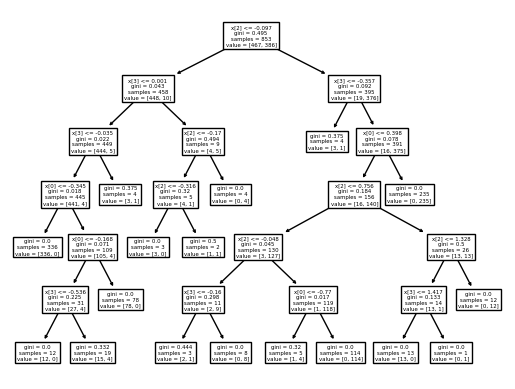

In [133]:
variacion1= tree.DecisionTreeClassifier(criterion='gini',max_depth=6,splitter="best",random_state=123,min_samples_split=5)
variacion1.fit(entrenamientoX, entrenamientoY)
scores1var = cross_val_score(modelo1P8, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores1var)
print(scores1var.mean())

tree.plot_tree(variacion1)
tree.export_graphviz(decision_tree=variacion1, class_names=True,out_file="ArbolVariacion1.dot")

<h1>Variación 2 </h1>

Características:
- criterion='gini'
- max_depth=6
- splitter="best"
- random_state=123
<p>
<b>Nuevo parámetro</b>
<li>min_samples_split=30

[0.95321637 0.94152047 0.96491228 0.96470588 0.97647059]
0.9601651186790505


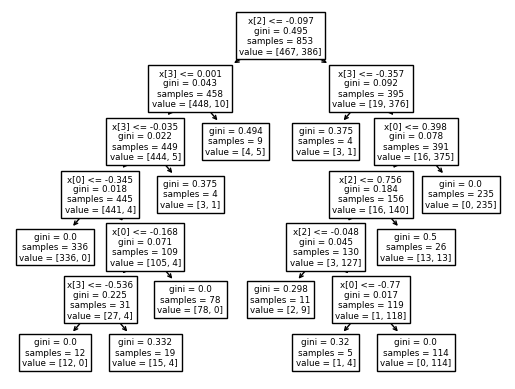

In [134]:
variacion2= tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=6, random_state=123, min_samples_split=30)
variacion2.fit(entrenamientoX, entrenamientoY)
scores2var = cross_val_score(variacion2, entrenamientoX, entrenamientoY, cv=5,scoring='accuracy')
print(scores2var)
print(scores2var.mean())

tree.plot_tree(variacion2)
tree.export_graphviz(decision_tree=variacion2, class_names=True,out_file="ArbolVariacion2.dot")

Ejecutamos los modelos en el conjunto de pruebas

In [135]:
datosPruebaVar = pipelineCompleto.transform(test_data)
prediccion1var = variacion1.predict(datosPruebaVar)
prediccion2var = variacion2.predict(datosPruebaVar)

#A continuación la tabla de accuracy y la matriz de confusión

Precision del modelo 1: 0.9719626168224299
Precision del modelo 2: 0.9439252336448598
Matriz de Confusión para modelo 1


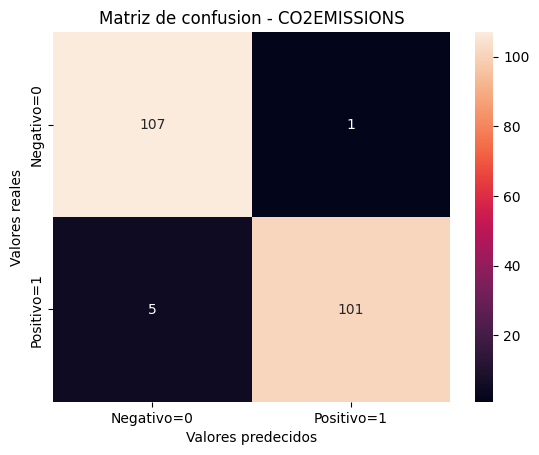



|   Modelo |   Accuracy |
|---------:|-----------:|
|        1 |   0.971963 |
|        2 |   0.943925 |


In [136]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tabulate import tabulate

pruebaVar = test_data["CO2EMISSIONS"]
accuracy1Var = accuracy_score(pruebaVar, prediccion1var)
accuracy2Var = accuracy_score(pruebaVar, prediccion2var)

print("Precision del modelo 1:", accuracy1Var)
print("Precision del modelo 2:", accuracy2Var)

matrizConfusion1 = confusion_matrix(pruebaVar, prediccion1var)
matrizConfusion2 = confusion_matrix(pruebaVar, prediccion2var)

matriz = plt.subplot()
sns.heatmap(matrizConfusion1, annot=True, ax = matriz, fmt='d')
# sns.heatmap(matrizConfusion2, annot=True, ax = matriz, fmt='d')

matriz.set_xlabel("Valores predecidos")
matriz.set_ylabel("Valores reales")
matriz.set_title("Matriz de confusion - CO2EMISSIONS")
matriz.xaxis.set_ticklabels(['Negativo=0', 'Positivo=1'])
matriz.yaxis.set_ticklabels(['Negativo=0', 'Positivo=1'])

print("Matriz de Confusión para modelo 1")
# print("Matriz de Confusión para modelo 2")

plt.show()

# Crear el DataFrame con los valores de accuracy
accuracy_values = [accuracy1Var, accuracy2Var]
df_accuracy = pd.DataFrame({"Modelo": range(1, 3), "Accuracy": accuracy_values})

# Imprimir la tabla
tabla = tabulate(df_accuracy, headers="keys", tablefmt="pipe", showindex=False)
print("\n")
print(tabla)

#Conclusión
Comparando estas 2 variaciones con el modelo anterior, podemos concluir lo siguiente:

<p>

Precisión de los modelos:
- Modelo 6 del Grupo 1: 0.9766355140186916
- Variación 1: 0.9719626168224299
- Variación 2: 0.9439252336448598

La precisión de la Variación 1 es ligeramente menor que la del Modelo 6 del Grupo 1. Esto indica que la precisión empeora un poco con la Variación 1, pero se mantiene relativamente alta.
La precisión de la Variación 2 es significativamente menor que la del Modelo 6 del Grupo 1. Esto indica que la precisión empeora notablemente con la Variación 2.
En general, el accuracy de ambas variaciones empeora, por lo que es mejor mantener las características del modelo 6 del grupo 1.